#### **Importing Libraries**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import pickle

#### **Load Dataset**

In [51]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','class','level'
]

train_data = pd.read_csv("/workspaces/SentinelNet/data/KDDTrain+.txt", header=None, names=columns)
test_data  = pd.read_csv("/workspaces/SentinelNet/data/KDDTest+.txt", header=None, names=columns)

print("Train Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

print("\nTrain dataset dataset:\n")
print(train_data.head())



Train Shape: (125973, 43)
Test Shape: (22544, 43)

Train dataset dataset:

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17 

In [52]:
print("\nTrain dataset info:\n")
print(train_data.info())

print("\nTrain dataset class distribution:\n")
print(train_data['class'].value_counts())


Train dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 

In [53]:
print("\nTest dataset info:\n")
print(test_data.info())

print("\nTest dataset class distribution:\n")
print(test_data['class'].value_counts())


Test dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  


#### **Data Cleaning**

In [54]:
print("Train Dataset Missing values:", train_data.isnull().sum().sum())
print("Train Dataset Duplicates:", train_data.duplicated().sum())
print("Test Dataset Missing values:", train_data.isnull().sum().sum())
print("Test Dataset Duplicates:", train_data.duplicated().sum())
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

Train Dataset Missing values: 0
Train Dataset Duplicates: 0
Test Dataset Missing values: 0
Test Dataset Duplicates: 0


#### **EDA - Binary Labels**

In [55]:
train_data['binary_label'] = train_data['class'].apply(lambda x: 0 if x=="normal" else 1)
test_data['binary_label']  = test_data['class'].apply(lambda x: 0 if x=="normal" else 1)

/tmp/ipykernel_11134/1961213162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="binary_label", data=train_data, palette="Set2")


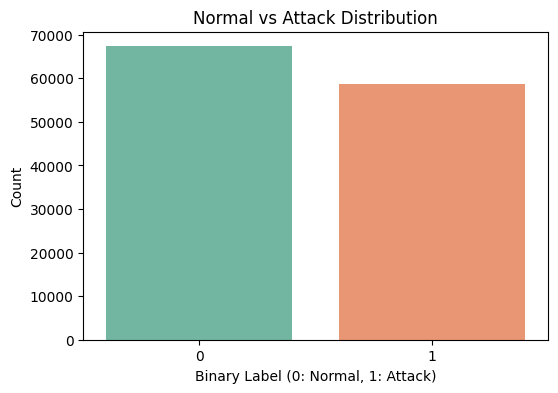

/tmp/ipykernel_11134/1961213162.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=train_data, order=train_data['class'].value_counts().index[:15], palette="Set3")


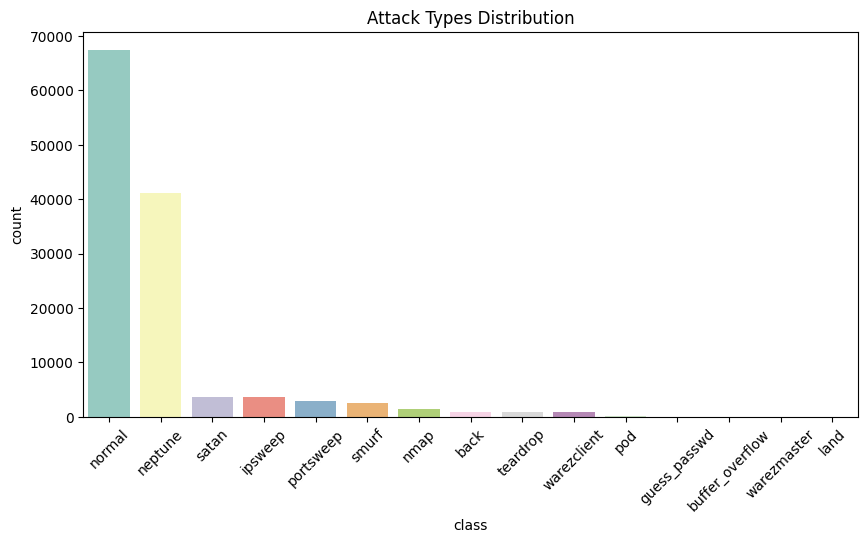

/tmp/ipykernel_11134/1961213162.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="protocol_type", data=train_data, palette="Set1")


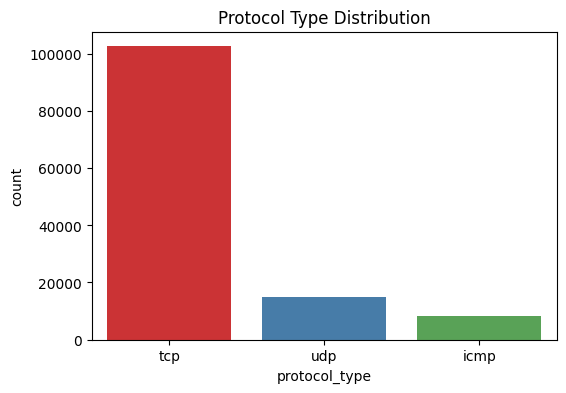

/tmp/ipykernel_11134/1961213162.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="service", data=train_data, order=train_data['service'].value_counts().index[:20], palette="Set1")


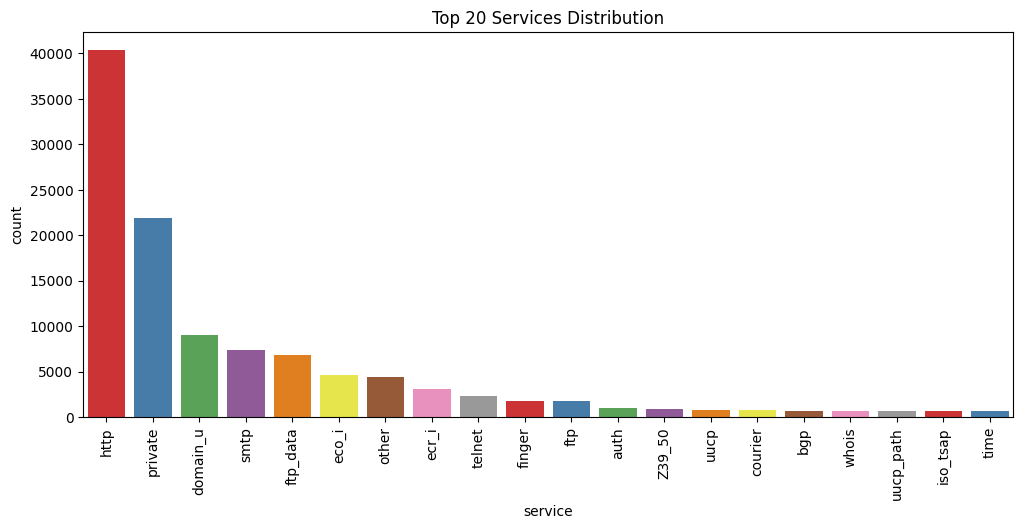

/tmp/ipykernel_11134/1961213162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="flag", data=train_data, palette="Set2")


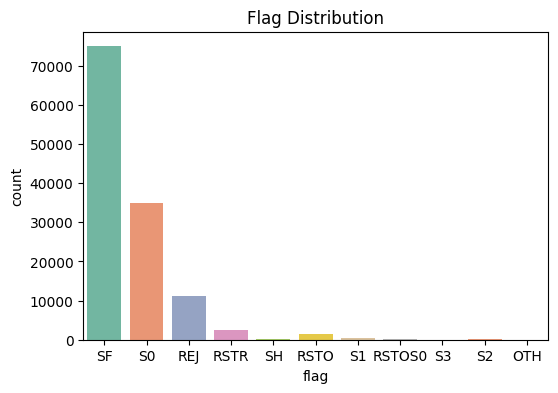

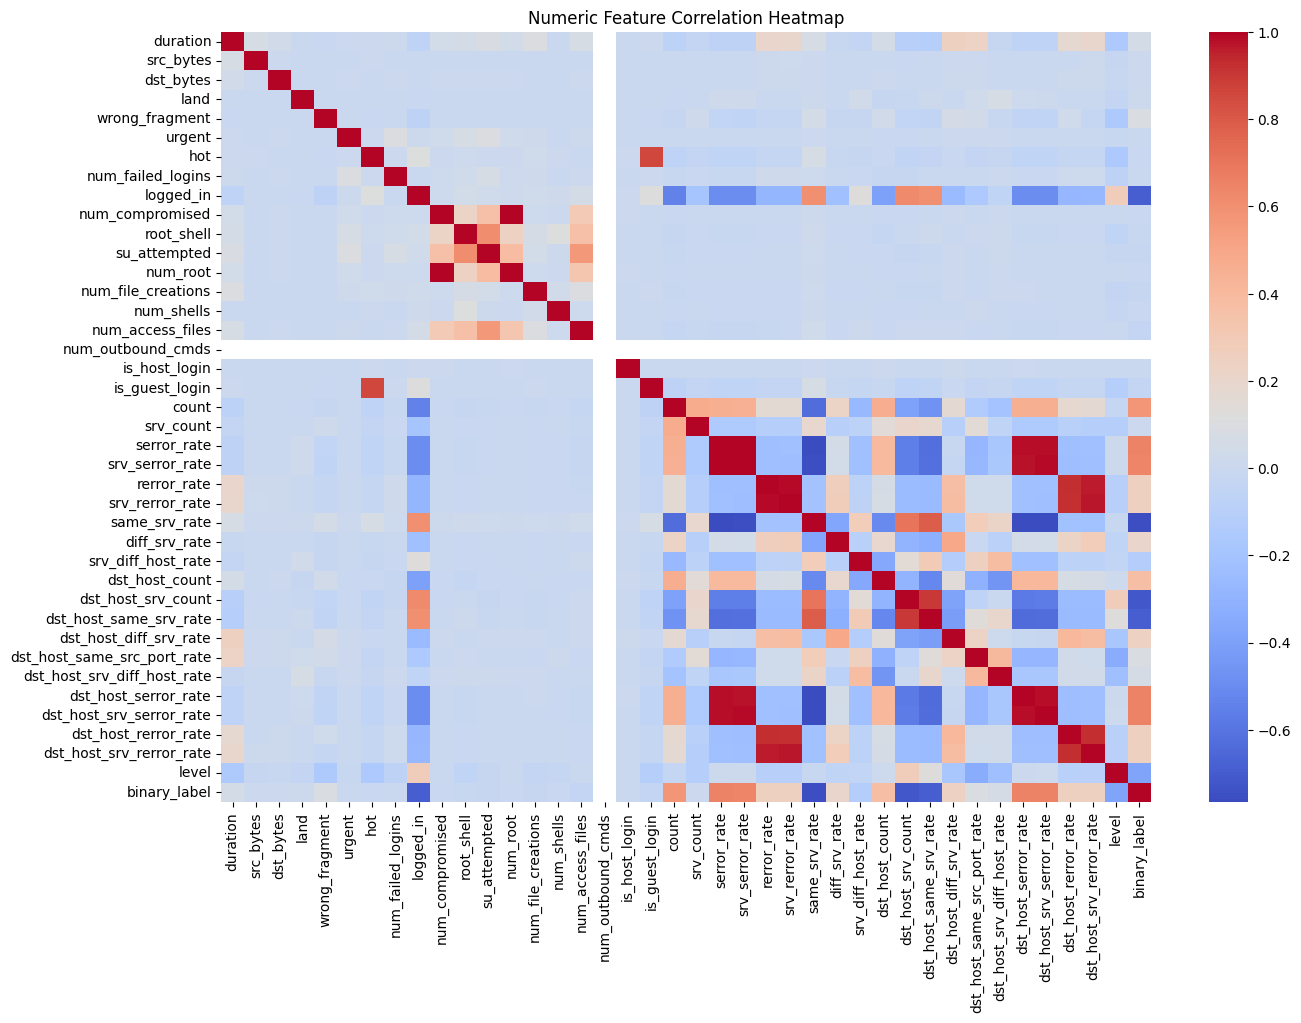

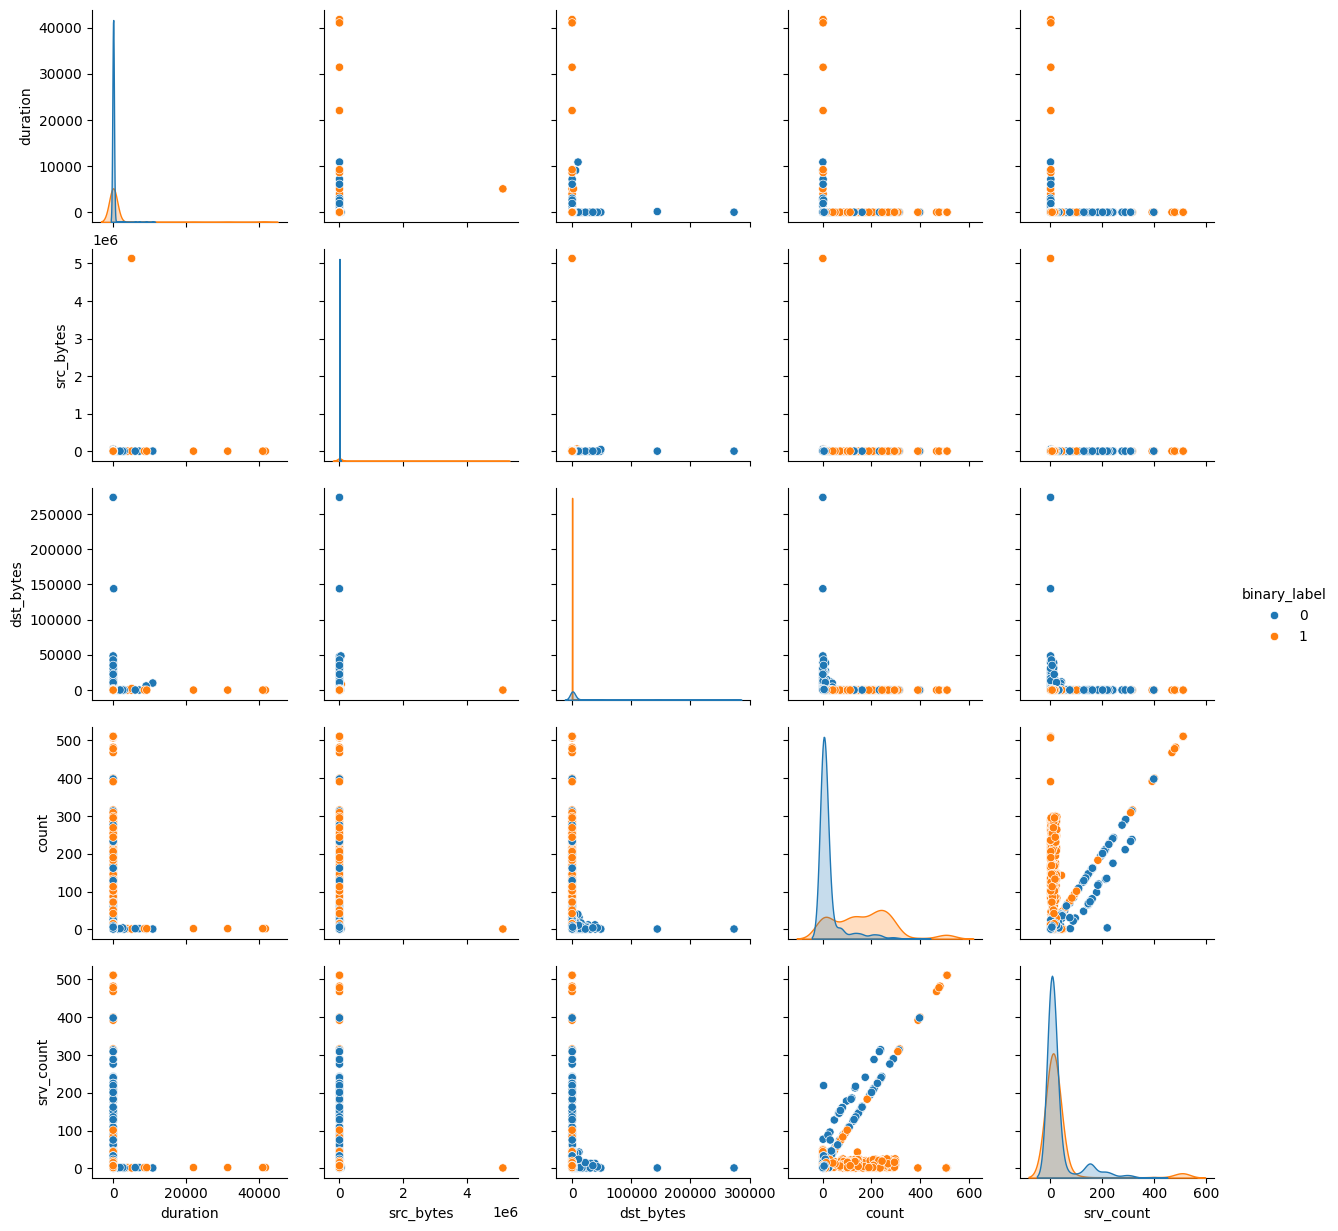

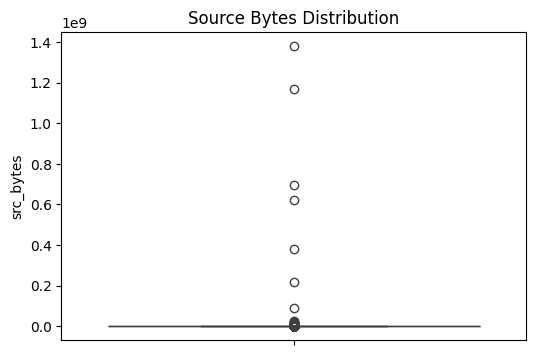

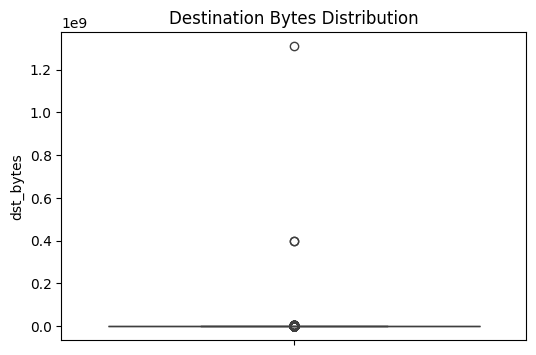

/tmp/ipykernel_11134/1961213162.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_cat", data=train_data, palette="Set2")


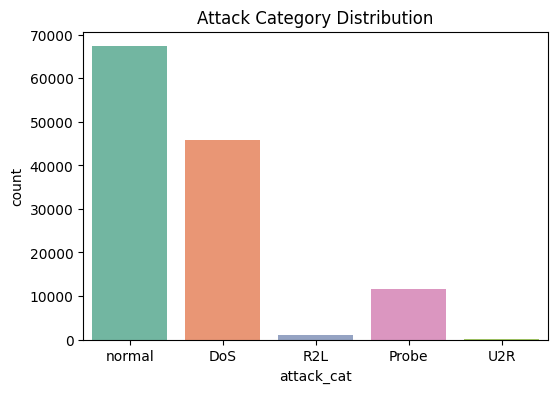

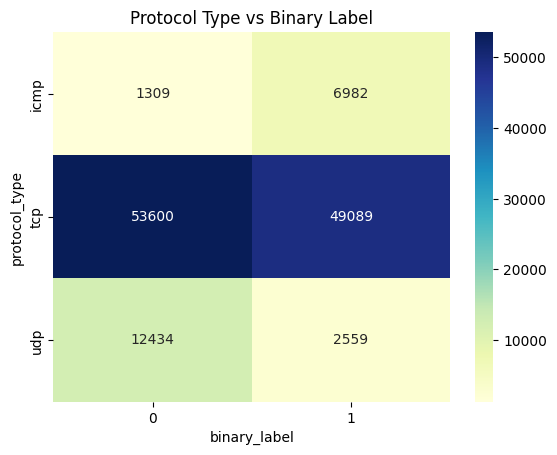

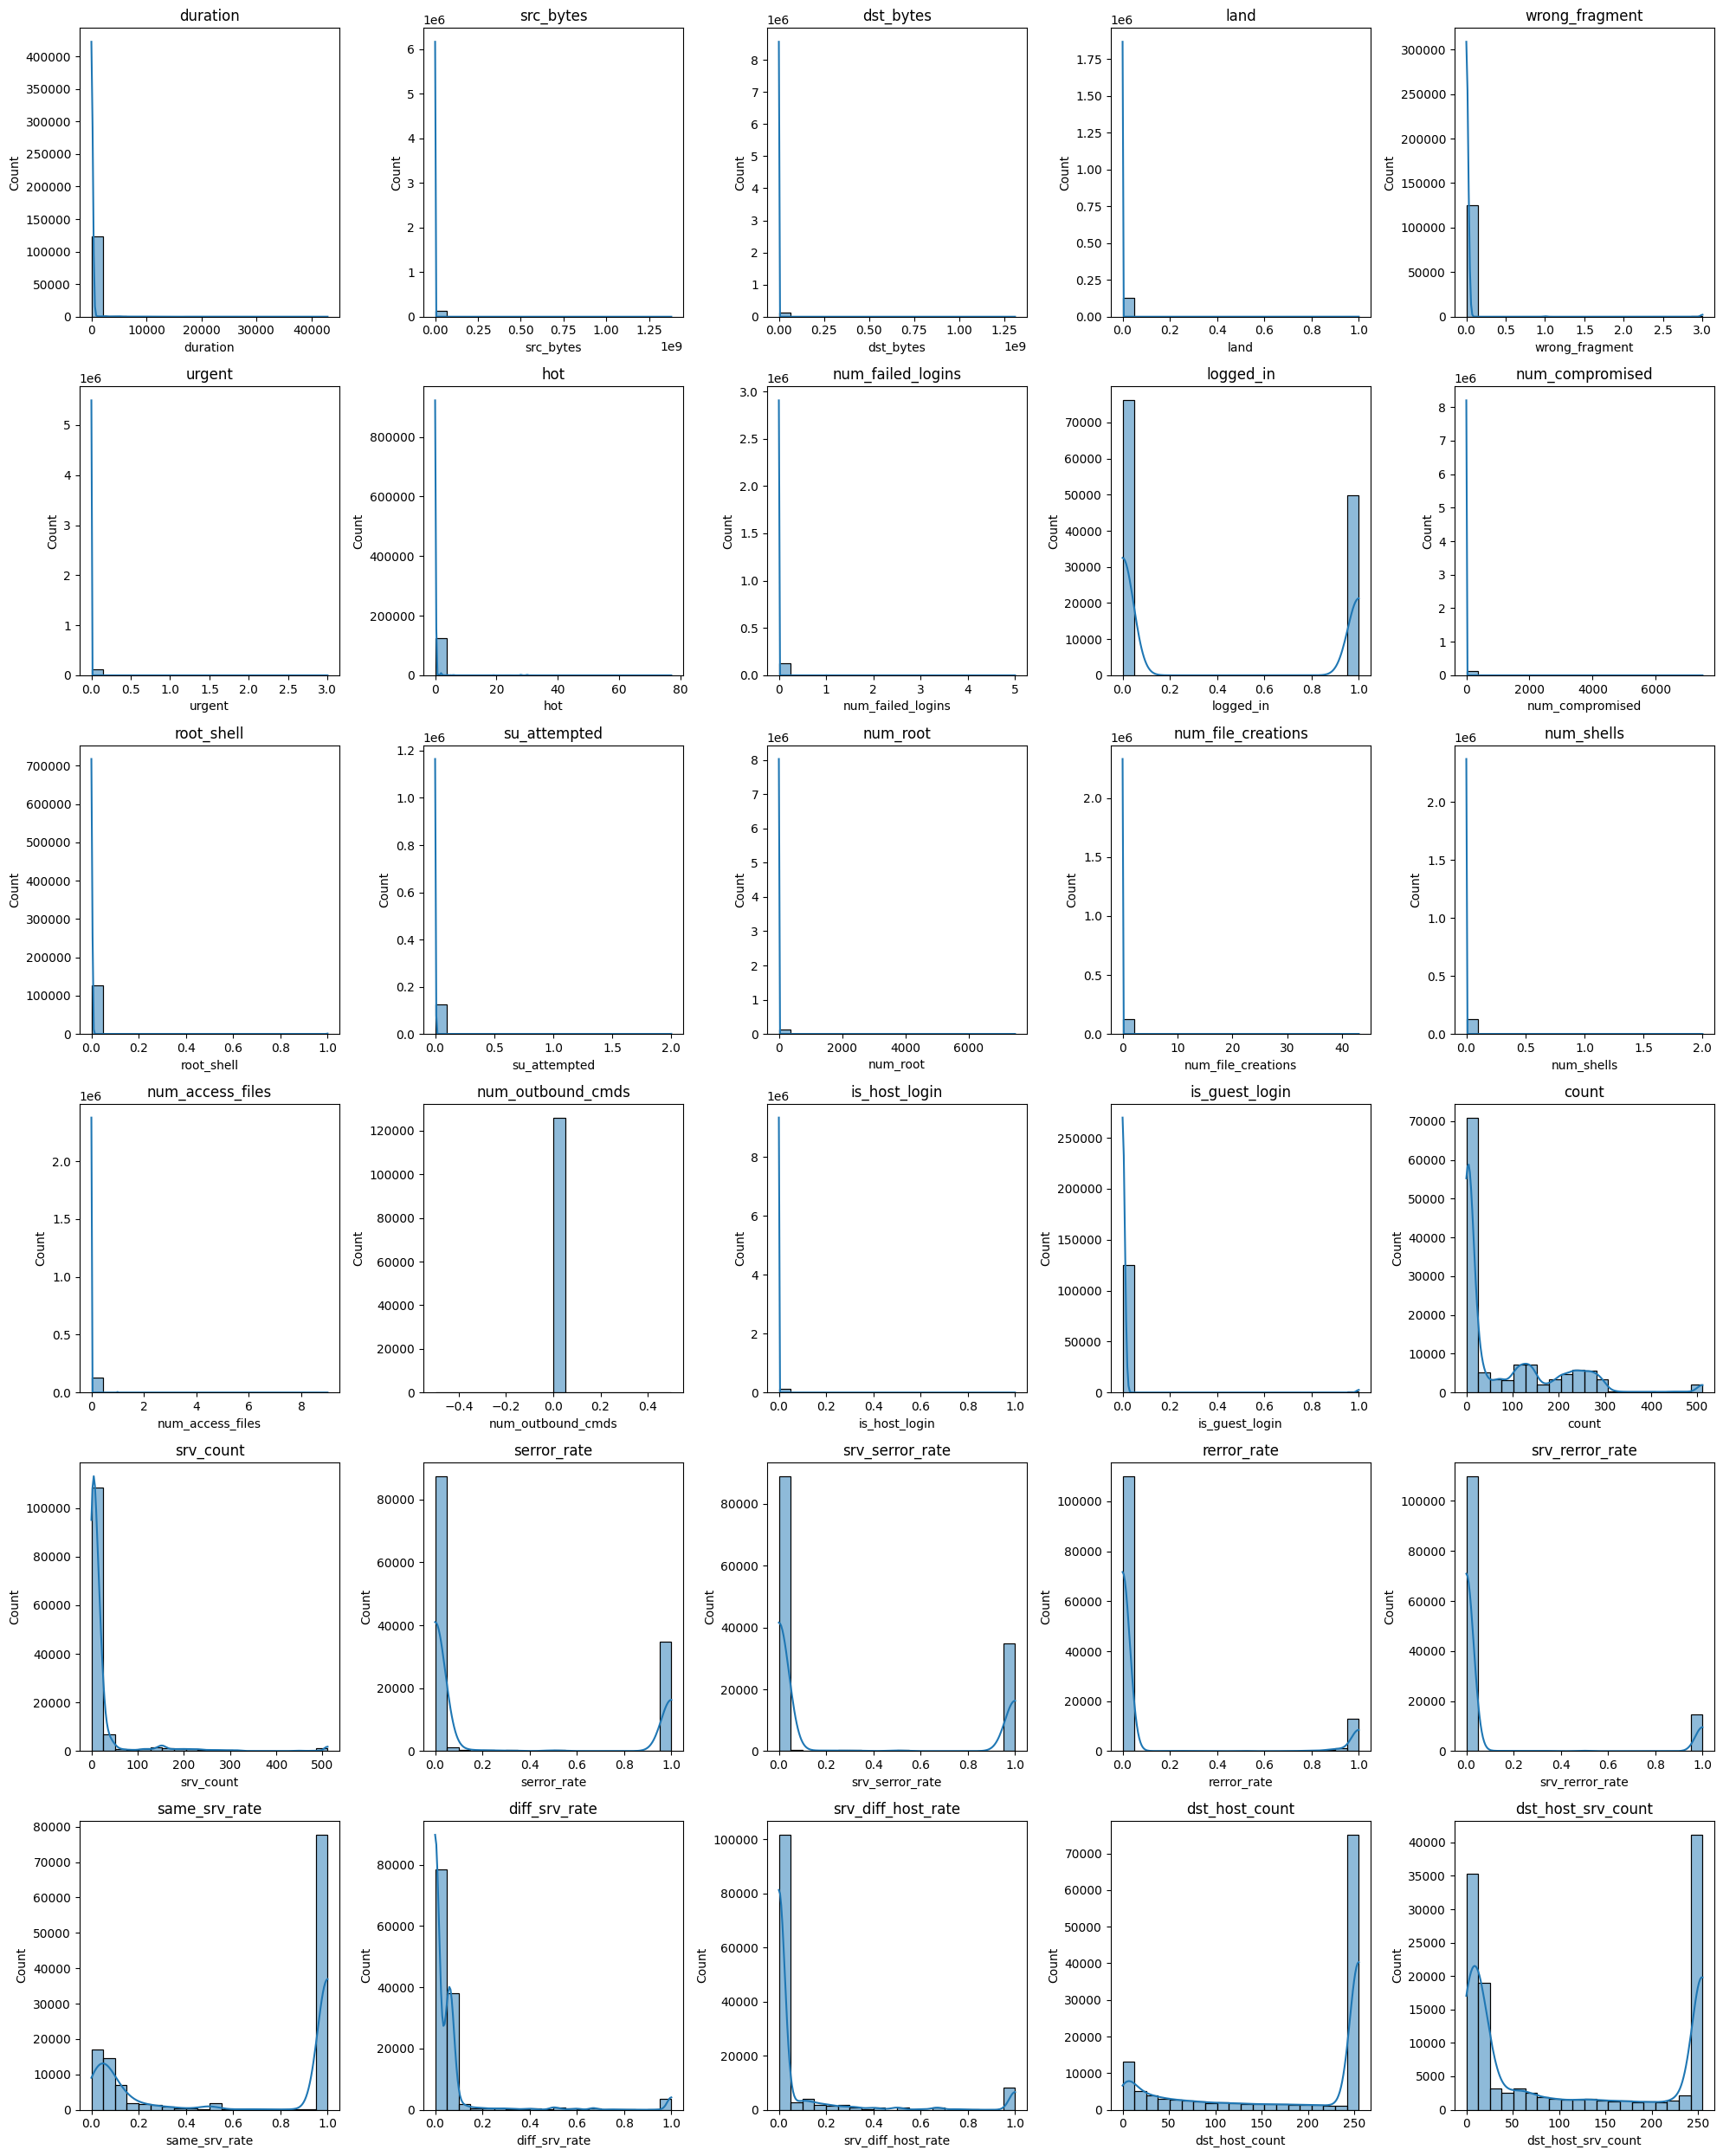

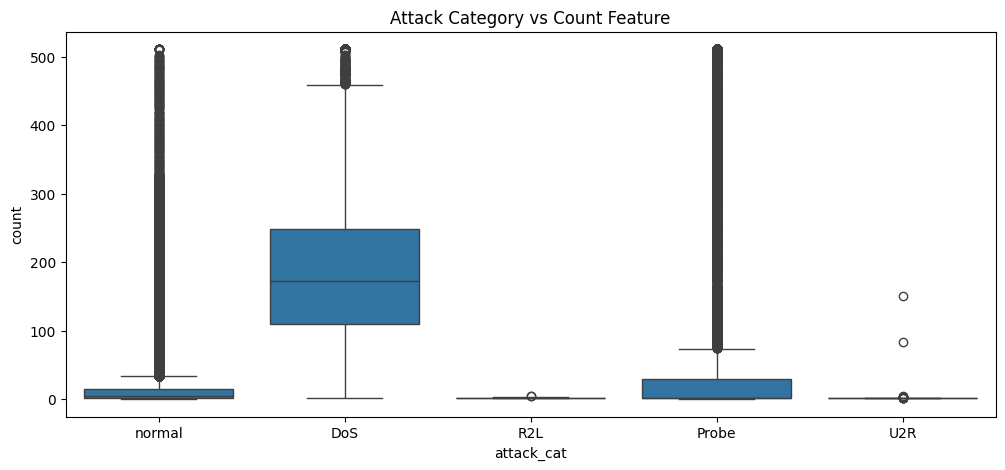

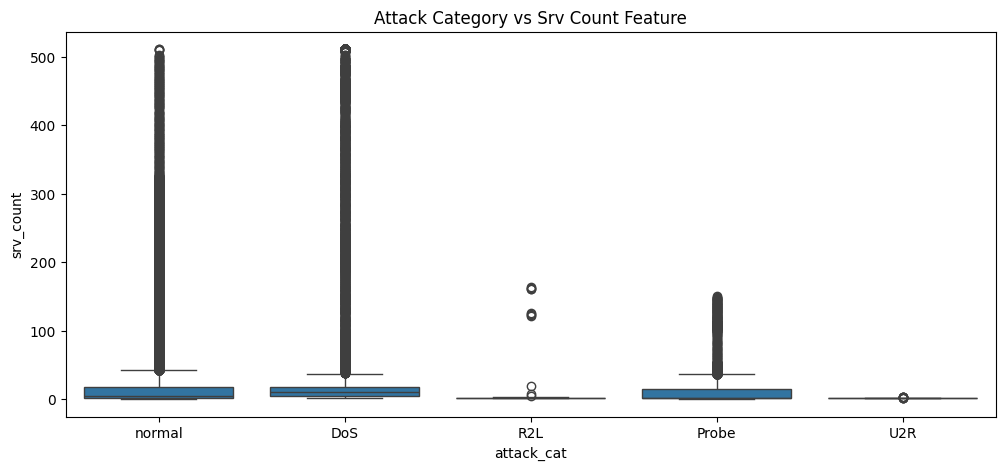

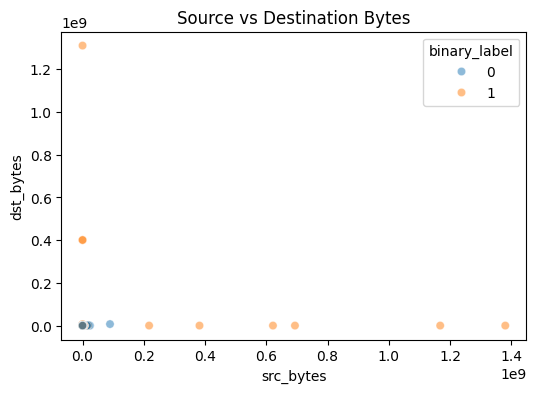

In [56]:
# 6.1 Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="binary_label", data=train_data, palette="Set2")
plt.title("Normal vs Attack Distribution")
plt.xlabel("Binary Label (0: Normal, 1: Attack)")
plt.ylabel("Count")
plt.show()

# 6.2 Multi-Class Attack Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="class", data=train_data, order=train_data['class'].value_counts().index[:15], palette="Set3")
plt.xticks(rotation=45)
plt.title("Attack Types Distribution")
plt.show()

# 6.3 Protocol Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="protocol_type", data=train_data, palette="Set1")
plt.title("Protocol Type Distribution")
plt.show()

# 6.4 Service Distribution
plt.figure(figsize=(12,5))
sns.countplot(x="service", data=train_data, order=train_data['service'].value_counts().index[:20], palette="Set1")
plt.xticks(rotation=90)
plt.title("Top 20 Services Distribution")
plt.show()

# 6.5 Flag Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="flag", data=train_data, palette="Set2")
plt.title("Flag Distribution")
plt.show()

# 6.6 Numeric Feature Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(numeric_only=True), cmap="coolwarm")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

# 6.7 Pairplot (Sample 1000 rows for speed)
sns.pairplot(train_data.sample(1000), hue="binary_label", vars=['duration','src_bytes','dst_bytes','count','srv_count'])
plt.show()

# 6.8 Boxplot - Src Bytes
plt.figure(figsize=(6,4))
sns.boxplot(y=train_data['src_bytes'])
plt.title("Source Bytes Distribution")
plt.show()

# 6.9 Boxplot - Dst Bytes
plt.figure(figsize=(6,4))
sns.boxplot(y=train_data['dst_bytes'])
plt.title("Destination Bytes Distribution")
plt.show()

# 6.10 Attack Category Mapping
attack_map = {
    "normal":"normal",
    "back":"DoS","land":"DoS","neptune":"DoS","pod":"DoS","smurf":"DoS","teardrop":"DoS",
    "ipsweep":"Probe","nmap":"Probe","portsweep":"Probe","satan":"Probe",
    "ftp_write":"R2L","guess_passwd":"R2L","imap":"R2L","multihop":"R2L",
    "phf":"R2L","spy":"R2L","warezclient":"R2L","warezmaster":"R2L",
    "buffer_overflow":"U2R","loadmodule":"U2R","perl":"U2R","rootkit":"U2R"
}
train_data['attack_cat'] = train_data['class'].map(attack_map)
test_data['attack_cat']  = test_data['class'].map(attack_map)

plt.figure(figsize=(6,4))
sns.countplot(x="attack_cat", data=train_data, palette="Set2")
plt.title("Attack Category Distribution")
plt.show()

# 6.11 Heatmap - Binary Label vs Protocol
ct = pd.crosstab(train_data['protocol_type'], train_data['binary_label'])
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Protocol Type vs Binary Label")
plt.show()

# 6.12 Feature Distributions - Histogram Grid
numeric_features = train_data.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features.remove('binary_label')
numeric_features.remove('level')

plt.figure(figsize=(20,25))
for i, col in enumerate(numeric_features[:30]):
    plt.subplot(6,5,i+1)
    sns.histplot(train_data[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 6.13 Attack Category vs Numeric Feature
plt.figure(figsize=(12,5))
sns.boxplot(x='attack_cat', y='count', data=train_data)
plt.title("Attack Category vs Count Feature")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='attack_cat', y='srv_count', data=train_data)
plt.title("Attack Category vs Srv Count Feature")
plt.show()

# 6.14 Scatter Plot - Src vs Dst Bytes
plt.figure(figsize=(6,4))
sns.scatterplot(x='src_bytes', y='dst_bytes', hue='binary_label', data=train_data, alpha=0.5)
plt.title("Source vs Destination Bytes")
plt.show()

#### **Fearture Engineering**

In [68]:
categorical_cols = ["protocol_type","service","flag"]
encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col]  = encoder.transform(test_data[col])

train_data['byte_ratio'] = train_data['src_bytes'] / (train_data['dst_bytes'] + 1)
test_data['byte_ratio']  = test_data['src_bytes'] / (test_data['dst_bytes'] + 1)

train_data['count_srv_ratio'] = train_data['count'] / (train_data['srv_count'] + 1)
test_data['count_srv_ratio']  = test_data['count'] / (test_data['srv_count'] + 1)

agg_features = train_data.groupby('attack_cat')[['duration','src_bytes','dst_bytes']].mean().reset_index()
print(agg_features)

  attack_cat  duration  src_bytes  dst_bytes
0        DoS -0.110247  -0.007562  -0.004877
1      Probe  0.686393   0.057938   0.040111
2        R2L  0.132951   0.044659   0.015429
3        U2R -0.079171  -0.007608  -0.003640
4     normal -0.045520  -0.005525  -0.003842


In [72]:
train_df = train_data
test_df = test_data

X_train_raw = train_df.drop(['class','binary_label','attack_cat','level'], axis=1)
y_train = train_df['binary_label']

X_test_raw = test_df.drop(['class','binary_label','attack_cat','level'], axis=1)
y_test = test_df['binary_label']

categorical_cols = ['protocol_type', 'service', 'flag']
numerical_cols = X_train_raw.columns.drop(categorical_cols)

# One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train_raw, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_raw, columns=categorical_cols, drop_first=True)

train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for i in missing_in_test:
    X_test_encoded[i] = 0
missing_in_train = set(test_cols) - set(train_cols)
for j in missing_in_train:
    X_train_encoded[j] = 0

X_test_encoded = X_test_encoded[train_cols]
print(f"Shape of training data after encoding: {X_train_encoded.shape}")
print(f"Shape of testing data after encoding: {X_test_encoded.shape}")

Shape of training data after encoding: (125973, 121)
Shape of testing data after encoding: (22544, 121)


In [71]:
# Standard Scaler

numerical_cols_to_scale = numerical_cols
scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train_encoded[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_test_encoded[numerical_cols_to_scale])

print('\n--- Scaled Training Data Head ---')
print(X_train_scaled.head())


--- Scaled Training Data Head ---
   duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3 -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4 -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   

        hot  num_failed_logins  logged_in  num_compromised  ...  flag_1  \
0 -0.095076          -0.027023  -0.809262        -0.011664  ...   False   
1 -0.095076          -0.027023  -0.809262        -0.011664  ...   False   
2 -0.095076          -0.027023  -0.809262        -0.011664  ...   False   
3 -0.095076          -0.027023   1.235694        -0.011664  ...   False   
4 -0.095076          -0.027023   1.235694        -0.011664  ...   False   

   flag_2  flag_3  flag_4  flag_5  flag_6  flag_7  flag_8  flag_9  flag_10 

In [75]:
# SMOTE

from sklearn.impute import SimpleImputer

smote = SMOTE(random_state=42)
print(f'Original Training Class Distribution: \n{y_train.value_counts()}')

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_scaled)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

print(f'\n Resampled Training Class Distribution: \n{y_train_resampled.value_counts()}')

Original Training Class Distribution: 
binary_label
0    67343
1    58630
Name: count, dtype: int64



 Resampled Training Class Distribution: 
binary_label
0    67343
1    67343
Name: count, dtype: int64


In [80]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
print("Training the Random Model")
rfc_model.fit(X_train_scaled, y_train)
print("Training Complete...!")

# Prediction
y_pred = rfc_model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc * 100:.3f}%")

# Classification Report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

Training the Random Model
Training Complete...!
Model Accuracy: 78.828%

Classification Report: 
              precision    recall  f1-score   support

      Normal       0.71      0.87      0.78      9711
      Attack       0.88      0.72      0.80     12833

    accuracy                           0.79     22544
   macro avg       0.79      0.80      0.79     22544
weighted avg       0.81      0.79      0.79     22544



#### **Confusion Matrix**

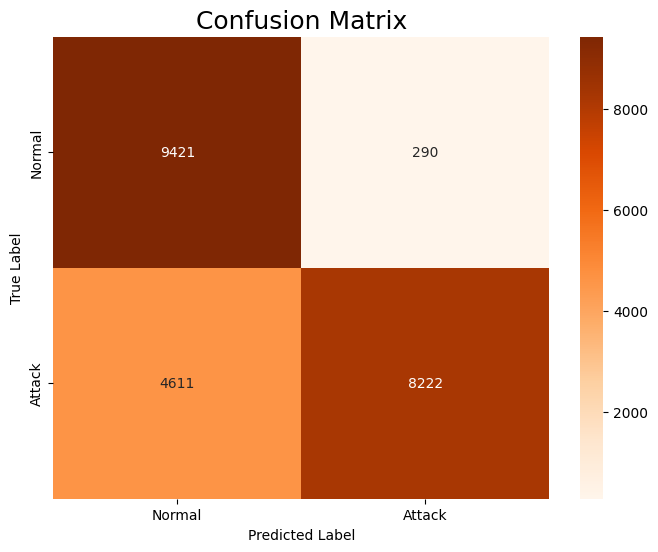

In [76]:
confuse = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confuse, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Training
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print(name + " trained.")

# Evaluation
results = []

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # For AUC, check if binary or multi-class
    if len(set(y_test)) == 2:
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        y_prob = model.predict_proba(X_test_scaled)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    results.append([name, accuracy, precision, recall, f1, auc])
    print(f"{name} Accuracy: {accuracy*100:.2f}%")

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"])
print(df_results)



Training Logistic Regression...


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training KNN...
KNN trained.
Training SVM...


In [ ]:
# Accuracy bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="Set2")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0,1)
plt.xticks(rotation=45)
for i, v in enumerate(df_results["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.show()

# Confusion matrices
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
cmaps = ["Blues", "Greens", "Oranges", "Purples", "Reds", "BuPu", "YlGn", "GnBu"]

for idx, ((name, model), cmap) in enumerate(zip(models.items(), cmaps)):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, 
                cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{name}", fontsize=12)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Boxplot of metrics
plt.figure(figsize=(8,5))
sns.boxplot(data=df_results.drop("Model", axis=1))
plt.title("Model Performance Distribution")
plt.show()

# Heatmap of metrics
plt.figure(figsize=(10,5))
sns.heatmap(df_results.set_index("Model"), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Performance Metrics Heatmap")
plt.show()


In [ ]:
plt.figure(figsize=(10,8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:  
        y_prob = model.decision_function(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()